In [16]:
import numpy as np
import matplotlib.pyplot as plt
from pyevtk.hl import pointsToVTK, gridToVTK

import logging
mpl_logger = logging.getLogger("matplotlib")
mpl_logger.setLevel(logging.WARNING)

write python data to vtk file for paraview  
required lib: pyevtk

1) Grid Data

In [29]:
dsize = [100, 120, 1]
data = np.random.randn(dsize[0], dsize[1], dsize[2])

data[data > 0] = 1
data[data < 0] = -1

print(data.shape)

(100, 120, 1)


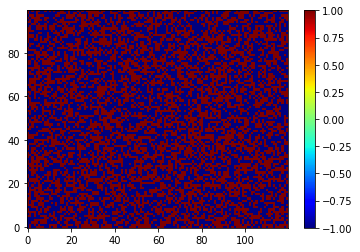

In [31]:
plt.imshow(data[:, :, 0], origin="lower", cmap="jet")
plt.colorbar()

In [34]:
# generate coordinates
xx = np.ascontiguousarray(np.linspace(0, dsize[0]-1, dsize[0]))
yy = np.ascontiguousarray(np.linspace(0, dsize[1]-1, dsize[1]))
zz = np.ascontiguousarray(np.linspace(0, dsize[2]-1, dsize[2]))

print(xx.shape, yy.shape, zz.shape)

gridToVTK("./out/1/2d_grid", xx, yy, zz, pointData = {"PT_Value" : data})

(100,) (120,) (1,)


'C:\\Users\\bruce\\Documents\\dev\\example\\out\\1\\2d_grid.vtr'

In paraview
![How it looks like in Paraview](figure/1/grid_example.png)

2) Point Data

In [39]:
data_shape = dsize = [100, 3]
data = np.zeros(data_shape)
value = np.ones((data_shape[0]))
# Generate locations
for ii in range(0, data.shape[1] - 1):
    data[:, ii] = np.random.rand(data.shape[0])
    

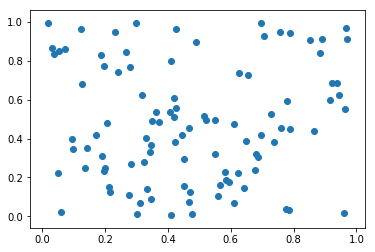

In [41]:
plt.scatter(data[:, 0], data[:, 1])

In [40]:
xx = np.ascontiguousarray(data[:, 0])
yy = np.ascontiguousarray(data[:, 1])
zz = np.ascontiguousarray(data[:, 2])

pointsToVTK("./out/1/2d_points", xx, yy, zz, data = {"PT_Value" : value}) 

'C:\\Users\\bruce\\Documents\\dev\\example\\out\\1\\2d_points.vtu'

In paraview
![How it looks like in Paraview](figure/1/pts_example.png)

3) load as an animation

use file name with a pattern as: "./out/1/2d_points_%d" than the paraview will load all of the files as an animation